# Instacart Data Visualizations  
# Achievement 4 – Exercise 4.9 (Part 2)

This notebook focuses on exploratory data analysis and visualizations using the fully prepared Instacart dataset created in Part 1. The goal is to generate stakeholder-ready insights related to customer behavior, ordering patterns, and demographic differences.

# Step 1: Create a new notebook and import necessary analysis, visualization libraries, and most up-to-dateproject data.

In [1]:
# Import core analysis libraries
import pandas as pd
import numpy as np
import os

In [2]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Set project root by moving one level up from the current working directory
path = os.path.dirname(os.getcwd())

In [4]:
# Check
path

'/Users/jessduong/Documents/CF/Achievement 4_Python/12-2025 Instacart Basket Analysis_Jessica_Duong'

In [5]:
# Import merged Instacart + customer dataset
ords_prods_cust = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust.pkl'))

In [6]:
# Preview data
ords_prods_cust.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_previous_order,first_order_flag,product_id,add_to_cart_order,...,median_days_since_prior_order,first_name,surname,gender,state,age,date_joined,n_dependents,family_status,income
0,2539329,1,prior,1,2,8,0.0,True,196,1,...,20.0,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
1,2539329,1,prior,1,2,8,0.0,True,14084,2,...,20.0,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
2,2539329,1,prior,1,2,8,0.0,True,12427,3,...,20.0,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
3,2539329,1,prior,1,2,8,0.0,True,26088,4,...,20.0,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
4,2539329,1,prior,1,2,8,0.0,True,26405,5,...,20.0,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423


In [7]:
# Check
ords_prods_cust.shape

(32435059, 35)

In [8]:
# Check
ords_prods_cust.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_previous_order', 'first_order_flag',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days_2', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_price_user', 'spending_flag', 'median_days_since_order',
       'order_frequency_flag', 'median_days_since_prior_order', 'first_name',
       'surname', 'gender', 'state', 'age', 'date_joined', 'n_dependents',
       'family_status', 'income'],
      dtype='object')

# Defining path to existing Visualizations folder

In [9]:
# Define path to existing Visualizations folder
viz_path = os.path.join(path, '04 Analysis', 'Visualizations')

In [10]:
# Check
viz_path

'/Users/jessduong/Documents/CF/Achievement 4_Python/12-2025 Instacart Basket Analysis_Jessica_Duong/04 Analysis/Visualizations'

# Step 2: Create  visual charts using sample set for line chart.

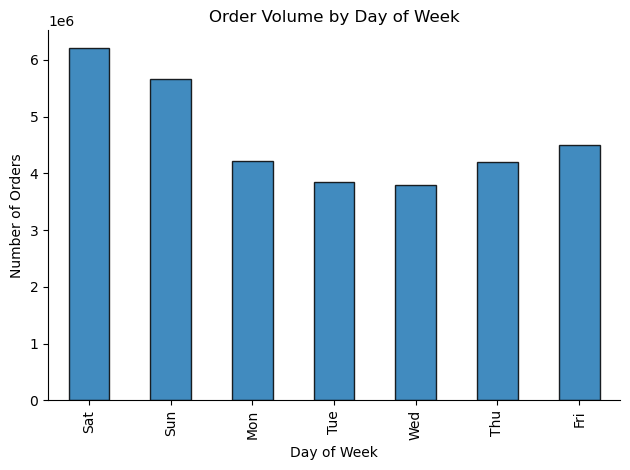

In [11]:
# Bar chart: Orders by day of week
bar_dow = (ords_prods_cust['orders_day_of_week'].value_counts().sort_index().plot.bar(edgecolor='black',alpha=0.85))
# edgecolor='black' clearer bar separation
# alpha=0.85softer fill
           
# .sort_index() ensures days are in chronological order (0–6)

# Labeling for clarity
bar_dow.set_xlabel('Day of Week')
bar_dow.set_ylabel('Number of Orders')
bar_dow.set_title('Order Volume by Day of Week')

# Replace numeric ticks with day names
bar_dow.set_xticks(range(7))
bar_dow.set_xticklabels(['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri'])

# Remove top/right borders for cleaner look
sns.despine()

# Tight layout
bar_dow.figure.tight_layout()

In [12]:
# Export the visualization
bar_dow.figure.savefig(os.path.join(viz_path, 'bar_orders_day_of_week.png'),bbox_inches='tight')

This bar chart shows how order volume varies across the days of the week.  Orders are highest on weekends, while mid-week days experience lower activity, suggesting opportunities to schedule promotions during slower periods.

# Step 3: Order hour by day histogram chart - descriptive findings about sales

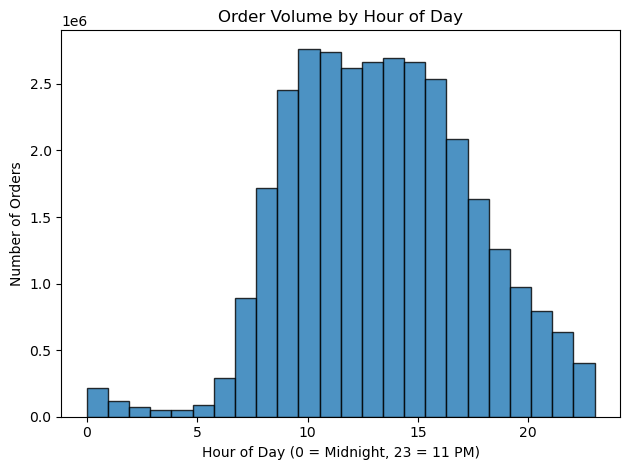

In [13]:
# Histogram: Orders by hour of day
hist_hour = ords_prods_cust['order_hour_of_day'].plot.hist(bins=24,edgecolor='black', alpha=0.8)            
# edgecolor='blac' separates bars clearly
# alpha=0.8 slightly transparent for readability)
                                                           
# Improved labeling
hist_hour.set_xlabel('Hour of Day (0 = Midnight, 23 = 11 PM)')
hist_hour.set_ylabel('Number of Orders')
hist_hour.set_title('Order Volume by Hour of Day')

# Tight layout for cleaner spacing
hist_hour.figure.tight_layout()

In [14]:
# Export into Visualization folder
hist_hour.figure.savefig(os.path.join(viz_path, 'hist_orders_hour_of_day.png'),bbox_inches='tight')

The histogram shows that order volume peaks between late morning and mid-afternoon, with significantly lower activity during overnight hours. This suggests that promotional efforts may be more effective if scheduled during low-traffic periods rather than peak ordering times.

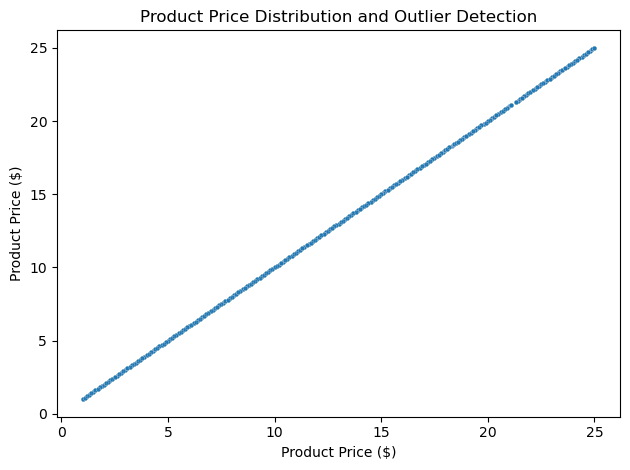

In [15]:
# Cleaner scatterplot for price outlier detection
scatter_price = sns.scatterplot(x='prices',y='prices',data=ords_prods_cust,alpha=0.1,s=10)
# alpha-0.1 transparency reduces visual clutter
# s=10 smaller points improve readability
# Labeling for clarity

scatter_price.set_xlabel('Product Price ($)')
scatter_price.set_ylabel('Product Price ($)')
scatter_price.set_title('Product Price Distribution and Outlier Detection')

# Tight layout
scatter_price.figure.tight_layout()

In [16]:
# Export scatterplot into visualizations folder
scatter_price.figure.savefig(os.path.join(viz_path, 'scatter_prices_outliers.png'),bbox_inches='tight')

This scatterplot was used to visually assess the distribution of product prices and identify potential outliers. Most prices are concentrated within a consistent range, with no extreme values observed that would distort subsequent analyses.

# Creating Line Chart - Spending by Day of Week
answers "Are there particcular times when people spend the most money?"

In [17]:
# Create a reproducible random sample split (70/30)
np.random.seed(4)
dev = np.random.rand(len(ords_prods_cust)) <= 0.7

big = ords_prods_cust[dev]
small = ords_prods_cust[~dev]

In [18]:
# Sanity check: counts should add up to full dataset
len(big) + len(small), len(ords_prods_cust)

(32435059, 32435059)

In [19]:
# Reduce dataset to only columns required for line chart
df_line = small[['orders_day_of_week', 'prices']]

In [20]:
# Quick check
df_line.head()

,orders_day_of_week,prices
0,2,9.0
2,2,4.4
3,2,4.7
6,3,3.0
10,3,4.0


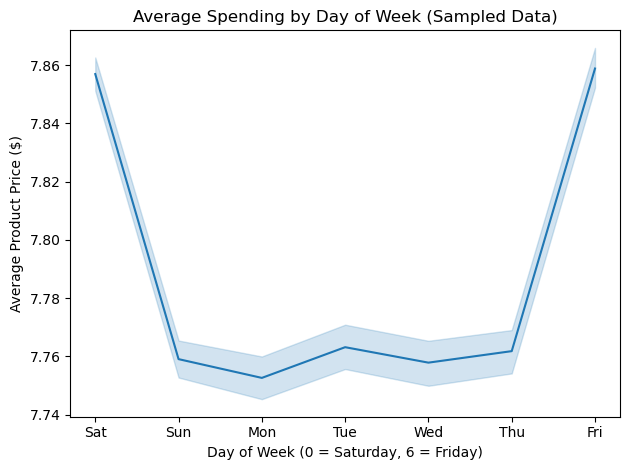

In [21]:
# Line chart: average spending by day of week using sampled data
line_day = sns.lineplot(data=df_line, x='orders_day_of_week', y='prices')

# Labeling for clarity
line_day.set_xlabel('Day of Week (0 = Saturday, 6 = Friday)')
line_day.set_ylabel('Average Product Price ($)')
line_day.set_title('Average Spending by Day of Week (Sampled Data)')

line_day.set_xticks(range(7))
line_day.set_xticklabels(['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri'])

# Tight layout
line_day.figure.tight_layout()

In [22]:
# Export visualization
line_day.figure.savefig(os.path.join(viz_path, 'line_avg_spending_by_day.png'), bbox_inches='tight')

This line chart illustrates average product spending across the days of the week using a representative sample of the data. Spending is slightly higher at the beginning and end of the week, suggesting customers tend to purchase higher-priced items during weekend periods.

# Step 4: Loyalty flag bar chart

In [23]:
# Check loyalty categories
ords_prods_cust['loyalty_flag'].value_counts()

loyalty_flag
Regular customer    15891507
Loyal customer      10294027
New customer         6249525
Name: count, dtype: int64

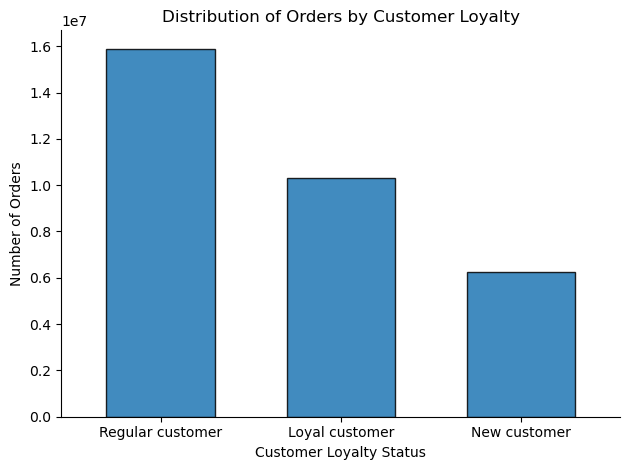

In [24]:
# Bar chart: distribution of customers by loyalty status
loyalty_bar = (ords_prods_cust['loyalty_flag'].value_counts().plot.bar(edgecolor='black',alpha=0.85, width=0.6))

# Labeling for clarity
loyalty_bar.set_xlabel('Customer Loyalty Status')
loyalty_bar.set_ylabel('Number of Orders')
loyalty_bar.set_title('Distribution of Orders by Customer Loyalty')

# Make x-axis labels horizontal
loyalty_bar.set_xticklabels(loyalty_bar.get_xticklabels(),rotation=0,ha='center')

# Clean up chart borders
sns.despine()

# Improve spacing
loyalty_bar.figure.tight_layout()

In [25]:
# Export cleaned chart
loyalty_bar.figure.savefig(os.path.join(viz_path, 'bar_loyalty_distribution.png'),bbox_inches='tight')

# Step 5: Checking difference in expenditure

In [26]:
# Reduce sampled dataset to only required columns
df_hour_spend = small[['order_hour_of_day', 'prices']]

In [27]:
# Aggregate: average spending by hour of day|
hourly_spend = df_hour_spend.groupby('order_hour_of_day')['prices'].mean().reset_index()

In [28]:
# Quick check
hourly_spend.head()

,order_hour_of_day,prices
0,0,7.782085
1,1,7.774635
2,2,7.756387
3,3,7.831524
4,4,7.853958


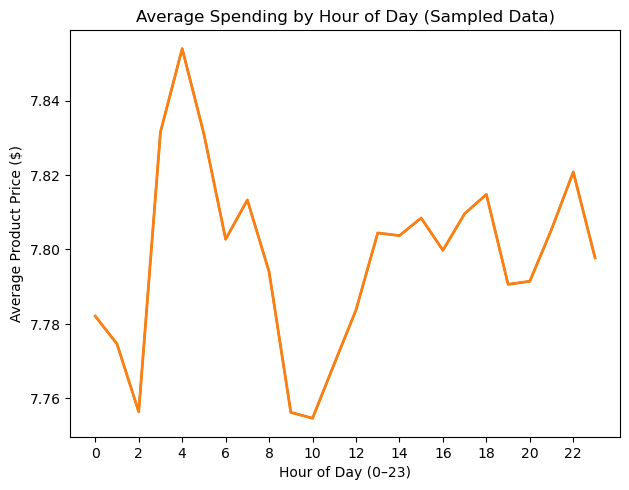

In [29]:
# Line chart: average spending by hour of day (sampled)
hour_line = sns.lineplot(data=hourly_spend,x='order_hour_of_day',y='prices')

# Improve spacing
hour_line.figure.tight_layout()
hour_line.figure.tight_layout()

# Change markers & linewidth to reduce visual noise
hour_line = sns.lineplot(
    data=hourly_spend,
    x='order_hour_of_day',
    y='prices',
    linewidth=2)

# Labeling for clarity
hour_line.set_xlabel('Hour of Day (0–23)')
hour_line.set_ylabel('Average Product Price ($)')
hour_line.set_title('Average Spending by Hour of Day (Sampled Data)')
hour_line.set_xticks(range(0, 24, 2));

In [30]:
# Export visualization
hour_line.figure.savefig(os.path.join(viz_path, 'line_avg_spending_by_hour.png'),bbox_inches='tight')

This line chart shows average product spending across different hours of the day using a representative sample. Spending remains relatively stable throughout the day, with slight increases during daytime and evening hours, suggesting marginally higher-value purchases during peak shopping periods.

# Step 6: Exploratory analysis of customer demographics Is there a connection between age and family situation?

In [31]:
# Reduce to required columns
df_age_dep = ords_prods_cust[['age', 'n_dependents']]

In [32]:
# Aggregate: average dependents by age
age_dependents = (df_age_dep.groupby('age')['n_dependents'].mean().reset_index())

In [33]:
# Quick check
age_dependents.head()

,age,n_dependents
0,18,1.507063
1,19,1.569450
2,20,1.478157
3,21,1.503868
4,22,1.472894


/var/folders/85/2tfx5b95721gp7lbbkvhcplw0000gn/T/ipykernel_62229/2103435408.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_dependents = (ords_prods_cust.groupby('age_group')['n_dependents'].mean().reset_index())


(1.48, 1.52)

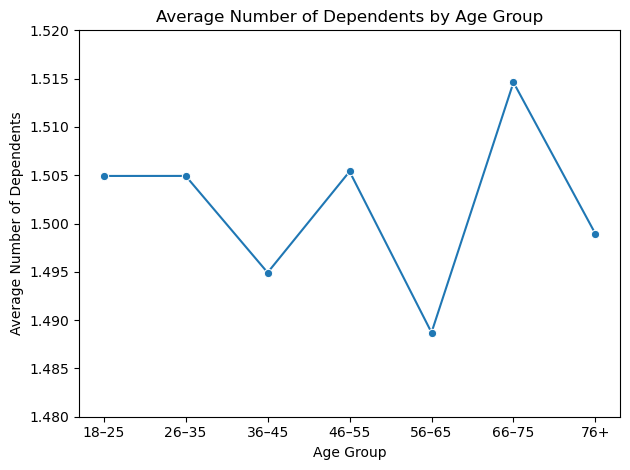

In [34]:
# Line chart: average number of dependents by age
ords_prods_cust['age_group'] = pd.cut(ords_prods_cust['age'], bins=[17, 25, 35, 45, 55, 65, 75, 85], labels=['18–25', '26–35', '36–45', '46–55', '56–65', '66–75', '76+'])

# Average number of dependents by age group
age_group_dependents = (ords_prods_cust.groupby('age_group')['n_dependents'].mean().reset_index())

# Line chart: average number of dependents by age group
age_dep_line = sns.lineplot(data=age_group_dependents, x='age_group', y='n_dependents', marker='o')

# Labeling for clarity
age_dep_line.set_xlabel('Age Group')
age_dep_line.set_ylabel('Average Number of Dependents')
age_dep_line.set_title('Average Number of Dependents by Age Group')

# Improve spacing
age_dep_line.figure.tight_layout()
age_dep_line.set_ylim(1.48, 1.52)

In [35]:
# Export
age_dep_line.figure.savefig(os.path.join(viz_path, 'line_avg_dependents_by_age_group.png'), bbox_inches='tight')

This line chart shows the average number of dependents across different age groups. The number of dependents remains relatively stable across age groups, suggesting only a weak relationship between age and family situation.

# Step 7: Age vs Income Scatterplot

In [36]:
# Reduce dataset to required columns
df_age_income = ords_prods_cust[['age', 'income']]

In [37]:
# Quick check
df_age_income.head()

,age,income
0,31,40423
1,31,40423
2,31,40423
3,31,40423
4,31,40423


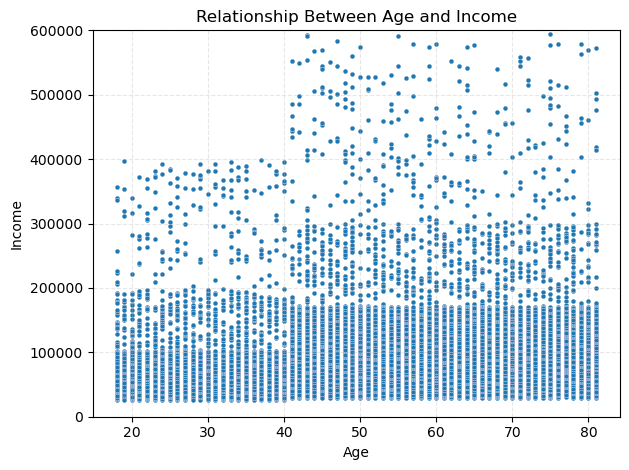

In [38]:
# Scatterplot: age vs income
age_income_scatter = sns.scatterplot(data=df_age_income, x='age', y='income', alpha=0.2, s=10)

# Labeling for clarity
age_income_scatter.set_xlabel('Age')
age_income_scatter.set_ylabel('Income')
age_income_scatter.set_title('Relationship Between Age and Income')

# Format y-axis as currency
age_income_scatter.ticklabel_format(style='plain', axis='y')

#Limit y-axis to exclude extreme outliers
age_income_scatter.set_ylim(0, 600000)

# Add a grid
age_income_scatter.grid(True, linestyle='--', alpha=0.3)

# Improve spacing
age_income_scatter.figure.tight_layout()

In [39]:
# Export scatterplot: Age vs Income
age_income_scatter.figure.savefig(os.path.join(viz_path, 'scatter_age_vs_income.png'), bbox_inches='tight')

This scatterplot shows the relationship between customer age and income. While income generally increases with age, the wide spread of values across all age groups indicates no strong linear relationship, suggesting income varies substantially regardless of age.